In [ ]:
# Asking the questions

# Sales Performance
# 1. What are the overall sales trends over time?
# 2. Which items are the top sellers by units sold and by revenue?
# 3. How do sales vary across different regions and countries?

# Customer Behavior
# 4. What are the purchasing patterns for different sales channels (Online vs. Offline)?
# 5. How does order priority impact sales performance?

# Profit Analysis
# 6. Which items and regions are the most profitable?
# 7. How do different item types contribute to overall profit?

In [46]:
# Loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

In [29]:
# Load the data into a pandas DataFrame

df = pd.read_csv(r"C:\Users\Public\Sales_Data.csv")
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544.0,01-11-2014,552,255.28,159.42
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07-05-2010,301644504.0,7/26/2010,2167,152.58,97.44
2,Europe,Czech Republic,Beverages,Offline,C,09-12-2011,478051030.0,9/29/2011,4778,47.45,31.79
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952.0,6/15/2010,9016,205.70,117.11
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596.0,7/27/2015,7542,152.58,97.44


In [39]:
# Get a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             5000 non-null   object 
 1   Country            5000 non-null   object 
 2   Item_Type          4989 non-null   object 
 3   Sales_Channel      5000 non-null   object 
 4   Order_Priority     5000 non-null   object 
 5   Order_Date         5000 non-null   object 
 6   Order_ID           4997 non-null   float64
 7   Ship_Date          5000 non-null   object 
 8   Units_Sold         5000 non-null   int64  
 9   Unit_SellingPrice  5000 non-null   float64
 10  Unit_MakingCost    5000 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 429.8+ KB


In [40]:
# Get basic statistics of numerical columns

df.describe()

,Order_ID,Units_Sold,Unit_SellingPrice,Unit_MakingCost
count,4.997000e+03,5000.000000,5000.000000,5000.000000
mean,5.485477e+08,5030.698200,265.745564,187.494144
std,2.593781e+08,2914.515427,218.716695,176.416280
min,1.000909e+08,2.000000,9.330000,6.920000
25%,3.201058e+08,2453.000000,81.730000,35.840000
50%,5.522766e+08,5123.000000,154.060000,97.440000
75%,7.686763e+08,7576.250000,437.200000,263.330000
max,9.998797e+08,9999.000000,668.270000,524.960000


In [31]:
# Checking for missing values

df.isnull().sum()

Region                0
Country               0
Item_Type            11
Sales_Channel         0
Order_Priority        0
Order_Date            0
Order_ID              3
Ship_Date             0
Units_Sold            0
Unit_SellingPrice     0
Unit_MakingCost       0
dtype: int64

In [32]:
# Handling the missing values

df['Item_Type'].fillna('Unknown',inplace = True)
df['Order_ID'].fillna(0, inplace =True)
df.isnull().sum()

Region               0
Country              0
Item_Type            0
Sales_Channel        0
Order_Priority       0
Order_Date           0
Order_ID             0
Ship_Date            0
Units_Sold           0
Unit_SellingPrice    0
Unit_MakingCost      0
dtype: int64

In [43]:
# Checking for duplicate values

df.loc[df.duplicated()]

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost


In [33]:
# Function to standardize date formats

def standardize_date_format(date_str):
    for fmt in ('%m/%d/%Y', '%m-%d-%Y', '%m/%d/%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.to_datetime(date_str, errors='coerce', dayfirst=True)

# Apply the function to standardize and convert dates

df['Order_Date'] = df['Order_Date'].apply(standardize_date_format)
df['Ship_Date'] = df['Ship_Date'].apply(standardize_date_format)

In [34]:
# Creating the new columns

df['Total_Sold_Price'] = df['Units_Sold'] * df['Unit_SellingPrice']
df['Total_Making_Cost'] = df['Units_Sold'] * df['Unit_MakingCost']
df['Profit_Per_Unit'] = df['Unit_SellingPrice'] - df['Unit_MakingCost']
df['Total_Profit'] = df['Units_Sold'] * df['Profit_Per_Unit']

In [51]:
# Sales Performance
# 1. What are the overall sales trends over time?
# 2. Which items are the top sellers by units sold and by revenue?
# 3. How do sales vary across different regions and countries?

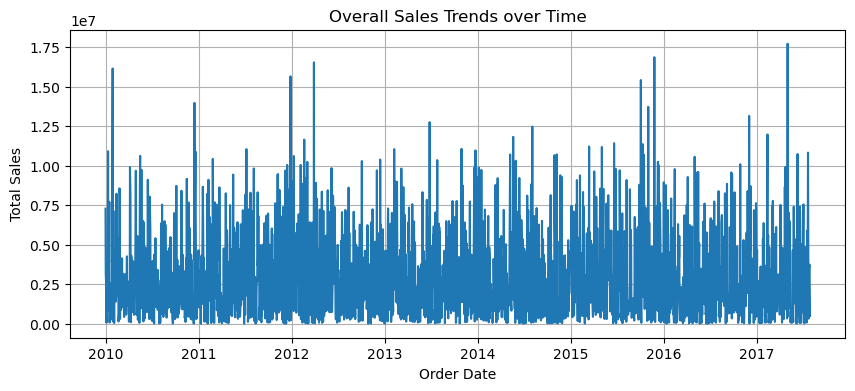

In [40]:
# 1. What are the overall sales trends over time?

sales_over_time = df.groupby('Order_Date')['Total_Sold_Price'].sum().reset_index()

plt.figure(figsize = (10,4))
plt.plot(sales_over_time['Order_Date'], sales_over_time['Total_Sold_Price'], linestyle = '-')
plt.title('Overall Sales Trends over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

C:\Users\Anjalika Mudunkotuwa\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



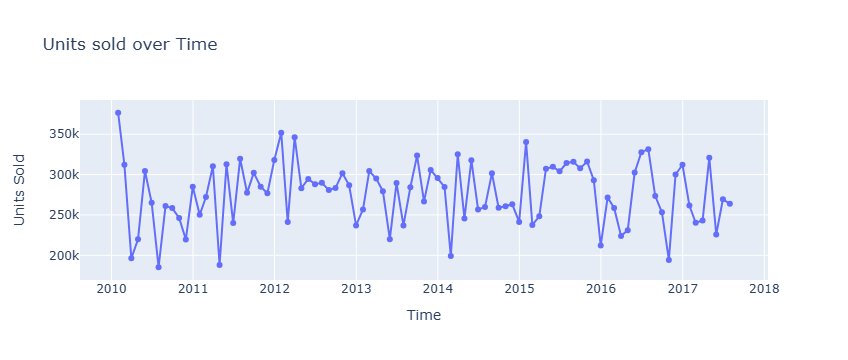

In [47]:
# Units sold over Time

monthly_sales = df.resample('M', on='Order_Date')['Units_Sold'].sum().reset_index()

fig = px.line(monthly_sales, x='Order_Date', y='Units_Sold',  markers =True, title = 'Units sold over Time', labels = {'Units_Sold': 'Units Sold', 'Order_Date': 'Time'})
fig.show()

C:\Users\Anjalika Mudunkotuwa\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



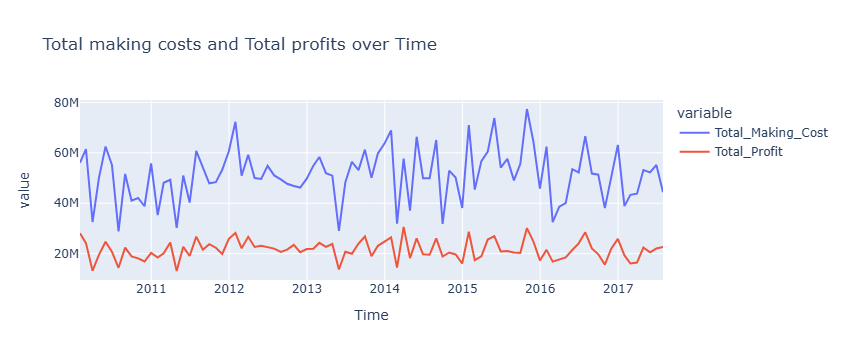

In [48]:
# Total making costs and Total profits over Time

monthly_aggregates = df.resample('M', on = 'Order_Date')[['Total_Making_Cost', 'Total_Profit']].sum().reset_index()

fig = px.line(monthly_aggregates, x = 'Order_Date', y = ['Total_Making_Cost','Total_Profit'], title = 'Total making costs and Total profits over Time', labels = {'Value': 'Costs and Profits', 'Order_Date': 'Time'})
fig.show()

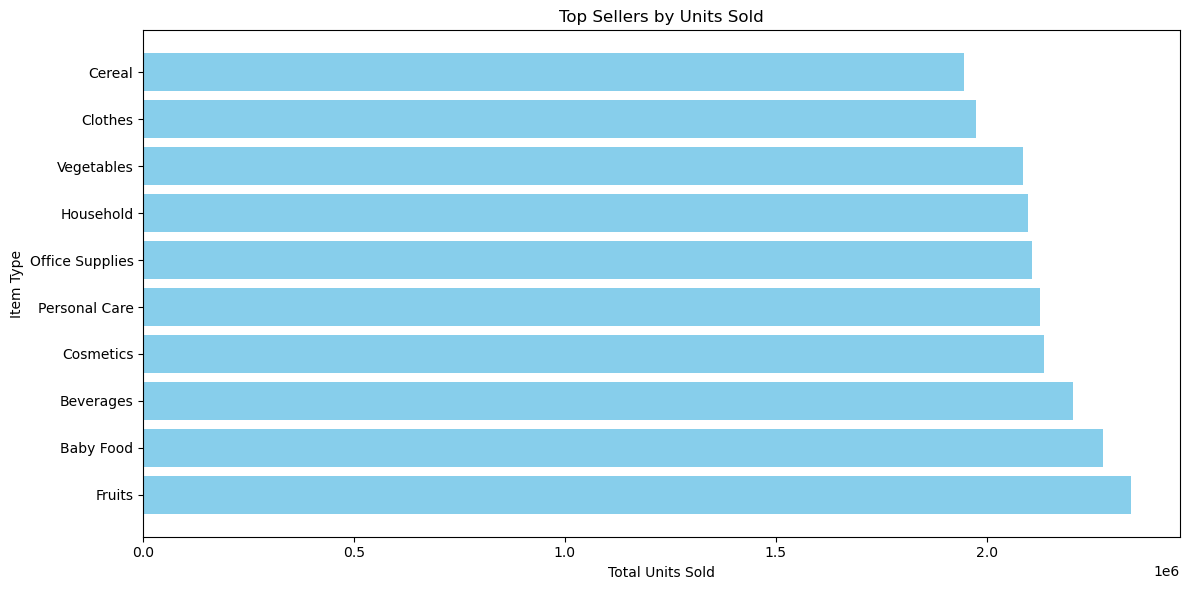

In [108]:
# 2. Which items are the top sellers by units sold and by revenue?

units_top_sellers = df.groupby('Item_Type')['Units_Sold'].sum().reset_index().sort_values(by = 'Units_Sold', ascending = False).head(10)
plt.figure(figsize = (12,6))
plt.barh(units_top_sellers['Item_Type'],units_top_sellers['Units_Sold'],color = 'skyblue')

plt.title('Top Sellers by Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Item Type')
plt.tight_layout()



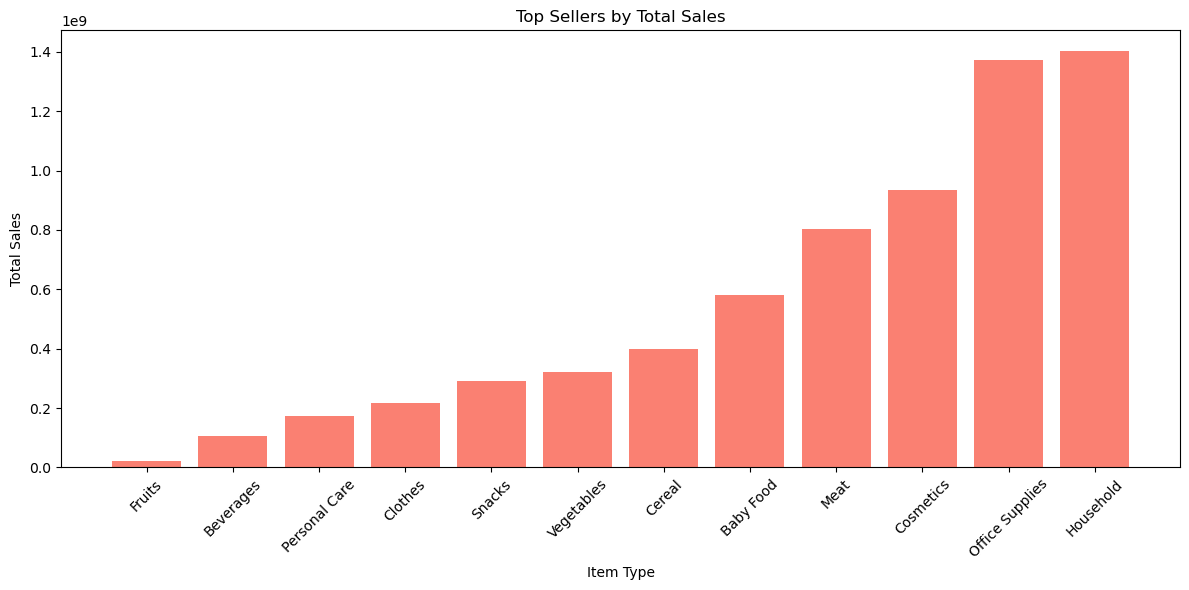

In [42]:
sales_top_sellers = df.groupby('Item_Type')['Total_Sold_Price'].sum().reset_index().sort_values(by='Total_Sold_Price',ascending=True).tail(12)
plt.figure(figsize = (12,6))
plt.bar(sales_top_sellers['Item_Type'], sales_top_sellers['Total_Sold_Price'],color='salmon')

plt.title('Top Sellers by Total Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

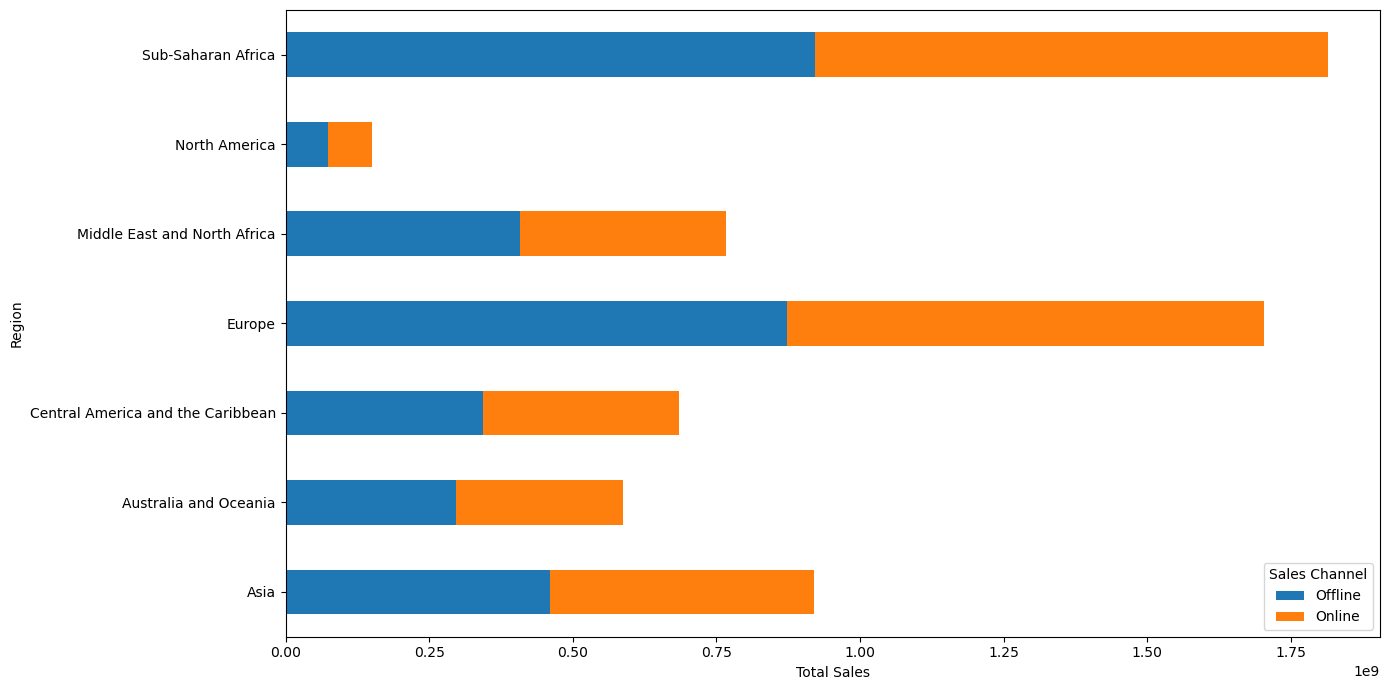

In [25]:
# 3. How do sales vary across different regions and countries?

grouped_items = df.groupby(['Region','Sales_Channel' ])['Total_Sold_Price'].sum().unstack()
grouped_items.plot(kind = 'barh', stacked =True, figsize= (14,7))
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.legend(title = 'Sales Channel')
plt.tight_layout()
plt.show()

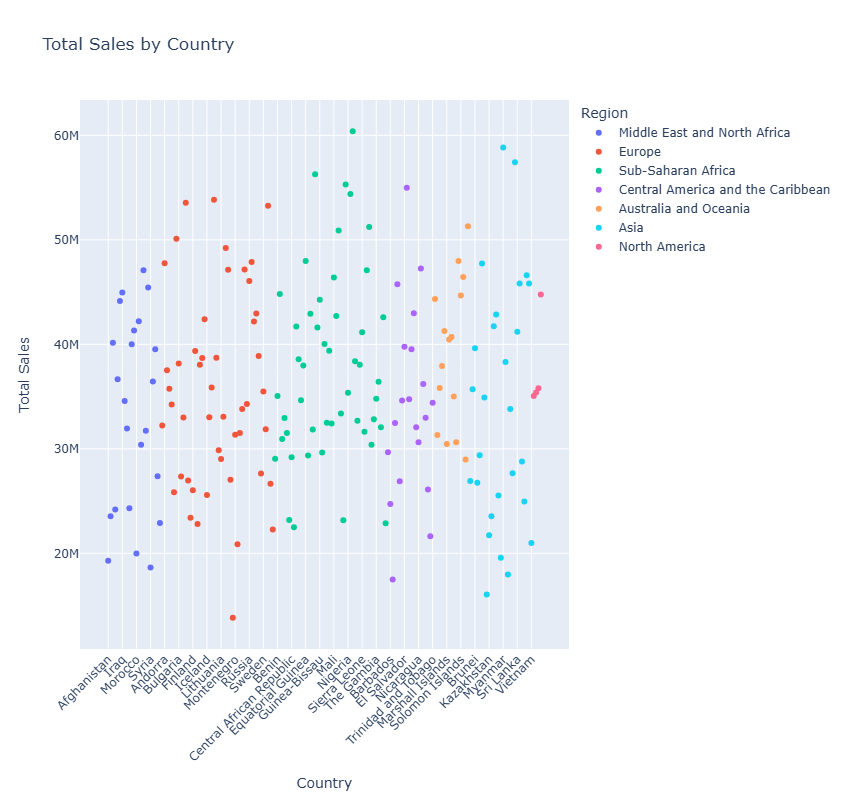

In [49]:
# Interactive scatterplot to show Sales by Country and Region

scatter_data = df.groupby(['Country', 'Region'])['Total_Sold_Price'].sum().reset_index()

fig = px.scatter(scatter_data, x='Country', y='Total_Sold_Price', color='Region', title='Total Sales by Country')
fig.update_layout( xaxis_title='Country', yaxis_title='Total Sales', xaxis_tickangle=-45, height = 800 )
fig.show()

In [44]:
# Customer Behavior
# 4. What are the purchasing patterns for different sales channels (Online vs. Offline)?
# 5. How does order priority impact sales performance?

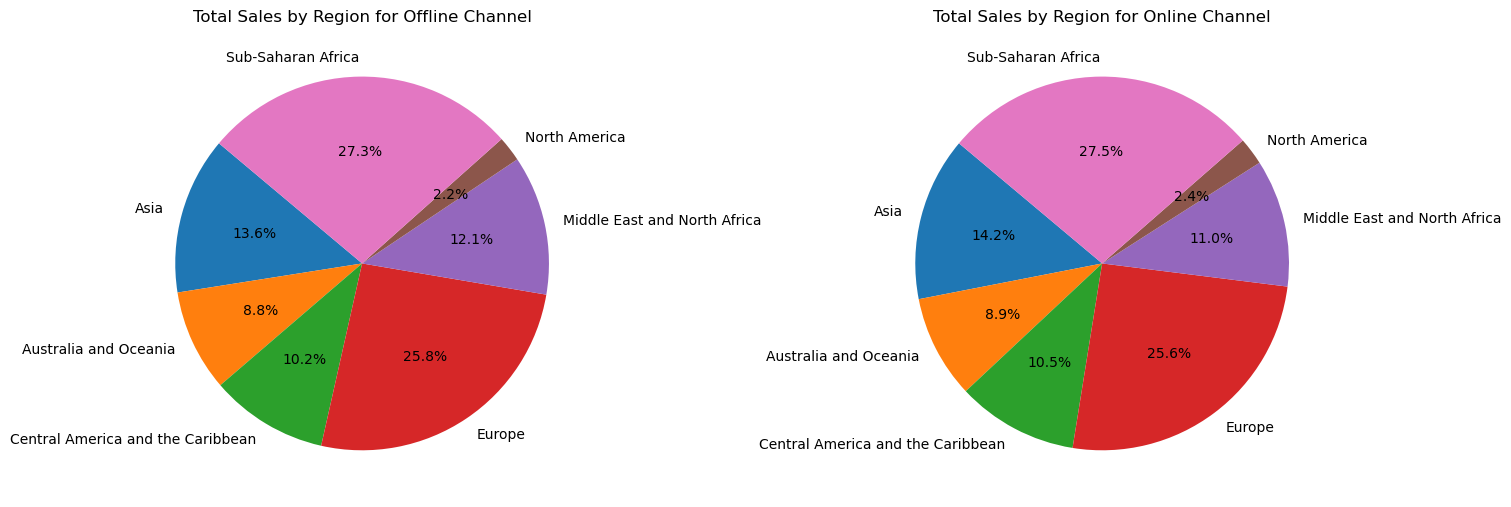

In [56]:
# 4. What are the purchasing patterns for different sales channels (Online vs. Offline)?

grouped = df.groupby(['Sales_Channel','Region'])['Total_Sold_Price'].sum().reset_index()
sales_channels = grouped['Sales_Channel'].unique()
fig,axs = plt.subplots(1, len(sales_channels), figsize = (15,7))
for i, channel in enumerate(sales_channels):
    channel_data = grouped[grouped['Sales_Channel'] == channel]
    axs[i].pie(channel_data['Total_Sold_Price'], labels = channel_data['Region'], autopct = '%1.1f%%', startangle= 140)
    axs[i].set_title(f'Total Sales by Region for {channel} Channel')

plt.tight_layout()

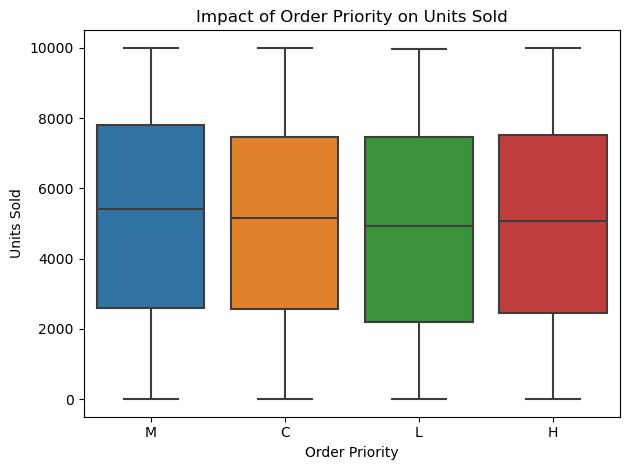

In [28]:
# 5. How does order priority impact sales performance?

# Impact of Order Priority on Units Sold

sns.boxplot(x ='Order_Priority', y = 'Units_Sold',  data = df)

plt.xlabel('Order Priority')
plt.ylabel('Units Sold')
plt.title('Impact of Order Priority on Units Sold')
plt.tight_layout()
plt.show()

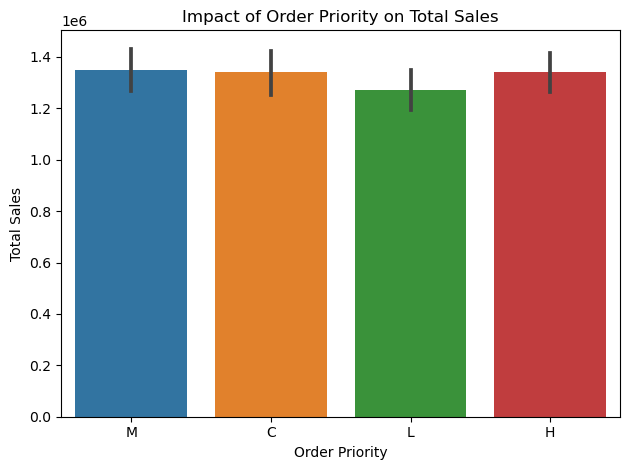

In [156]:
# Impact of Order Priority on Total Sales

sns.barplot(x ='Order_Priority', y = 'Total_Sold_Price',  data = df)

plt.xlabel('Order Priority')
plt.ylabel('Total Sales')
plt.title('Impact of Order Priority on Total Sales')
plt.tight_layout()
plt.show()

In [ ]:
# Profit Analysis
# 6. Which items and regions are the most profitable?
# 7. How do different item types contribute to overall profit?

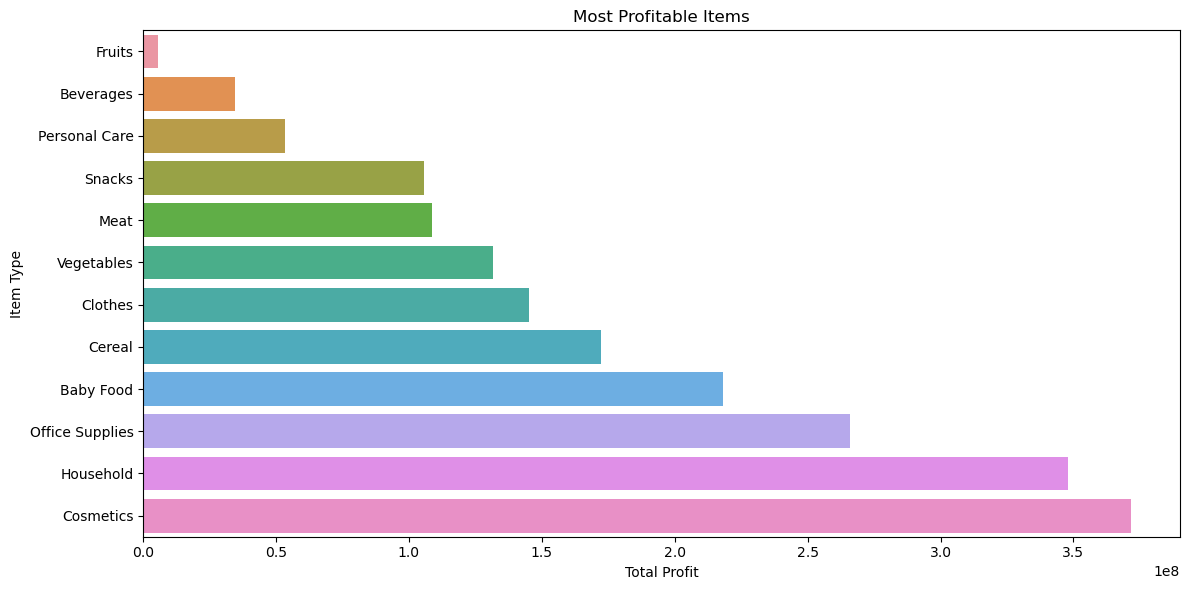

In [167]:
# 6. Which items and regions are the most profitable?

# Most profitable items:

item_profit = df.groupby('Item_Type')['Total_Profit'].sum().reset_index().sort_values(by = 'Total_Profit').tail(12)

plt.figure(figsize = (12,6))
sns.barplot(x = 'Total_Profit', y = 'Item_Type', data = item_profit, orient = 'h')
plt.title('Most Profitable Items')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()

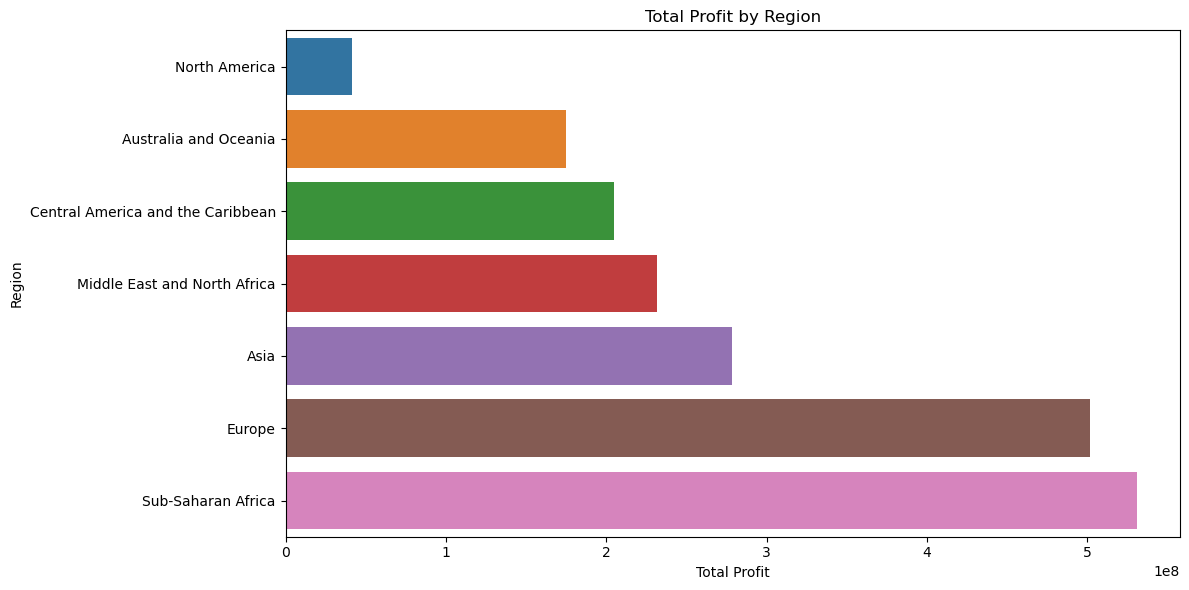

In [173]:
# Most profitable Region

region_profit = df.groupby('Region')['Total_Profit'].sum().reset_index().sort_values(by = 'Total_Profit')

plt.figure(figsize=(12, 6))
sns.barplot(x ='Total_Profit', y = 'Region', data = region_profit)
plt.title('Most Profitable Regions')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

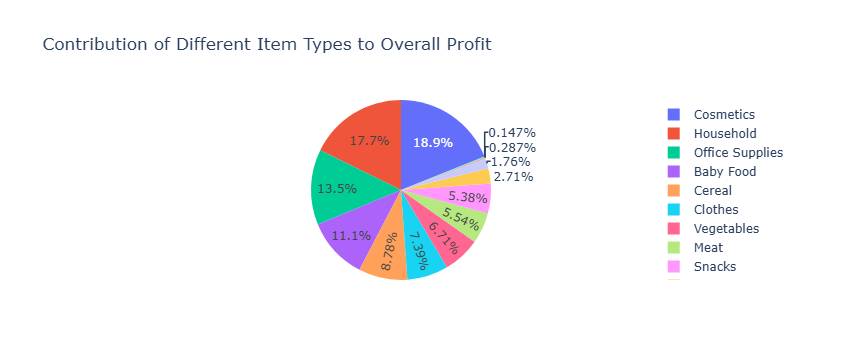

In [50]:
# 7. How do different item types contribute to overall profit?

item_profit = df.groupby('Item_Type')['Total_Profit'].sum().reset_index()

fig = px.pie(item_profit, names='Item_Type', values='Total_Profit', title='Contribution of Different Item Types to Overall Profit')
fig.show()